# <span style="color:#f542b9;font-size:8vw;font-weight:900;text-shadow:2px 2px 4px #aaa">Logistic Multi-Class</span>

# <span style="font-size:6vw;font-weight:800;text-shadow:2px 2px 10px #aaa">Two Days Faculty Development Programe</span>
## <span style="font-size:4vw;font-weight:800">Alok Pandey <br> Ashvini Jangid</span>
## <span style="font-size:4vw;font-weight:800"><a href="https://imjangid.xyz">ashvinijangid@gmail.com</a></span>

## Iris Data classification with Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
import operator
import warnings
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

## Load data

<IPython.core.display.Javascript object>


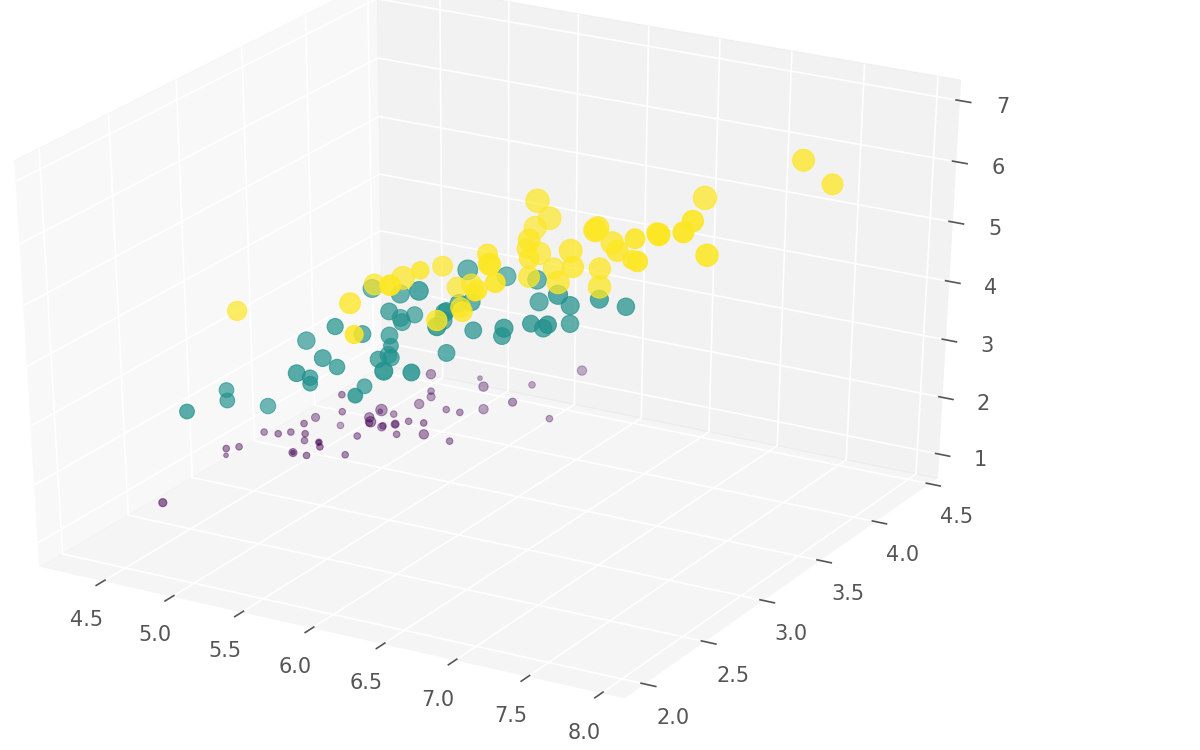

In [2]:
%matplotlib notebook
data = load_iris()
Y = data["target"]
X = np.insert(data["data"], 0, 1, axis=1)
# # print(data.DESCR[:500])
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111, projection="3d")
ax.set_facecolor(("white"))
ax.scatter3D(X[:, 1], X[:, 2], X[:, 3], c=Y,s=X[:,4]*50)
plt.subplots_adjust(top=1.1, bottom=0, left=-0.1)


In [3]:
def hypothysis(x, weight):
    return np.array(np.dot(x, weight)).astype((np.float64))

In [4]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

### Use softmax for multi-class

In [5]:
def softmax(Z):
    value = np.exp(Z) / sum(np.exp(Z))
    return value

In [6]:
def gradient_decent(x, y, weight, alpha=0.1):
    Y_cap = hypothysis(x, weight)
    S_cap = sigmoid(Y_cap)
    weight = weight - alpha * np.dot((S_cap - y), x) / len(y)
    return weight

In [7]:
def fit(x, y):
    weight = np.zeros(len(X[0]))
    for i in np.arange(1, 0.001, -0.0001):
        weight = gradient_decent(x, y, weight, i)
    return weight

###  get_class is one vs all spliter
###  train_for_each => Train model with each class

In [8]:
def get_data(cls):
    x, y = [], []
    for i, j in zip(X, Y):
        if j == cls:
            j = 1
        else:
            j = 0
        x.append(i)
        y.append(j)
    return x, y


def train_for_each_class():
    classes = [0, 1, 2]
    weights = dict()
    for i in classes:
        x, y = get_data(i)
        weights[i] = fit(x, y)
    return weights

In [9]:
weights = train_for_each_class()

#### test all data and show where is error

In [10]:
def test():
    fig = plt.figure(figsize=(8, 5))
    ax = plt.subplot(111, projection="3d")
    ax.set_facecolor(("white"))
    plt.subplots_adjust(top=1.1, bottom=0, left=-0.1)
    ax.scatter3D(X[:, 1], X[:, 2], X[:, 3], c=Y,s=X[:,4]*50)
    for i, data in enumerate(zip(X, Y)):
        x, y = data
        values = []
        for i in weights:
            values.append(hypothysis(x, weights[i]))
        index, v = max(enumerate(softmax(values)), key=operator.itemgetter(1))
        
        if y != index:
            ax.scatter3D(x[1], x[2] , x[3], c="k",s=x[4]*100)
            print(("Error =>", x, "Actual=>", y, "Predict =>", v))
    print(("Accuracy", 100 - 3 / 150 * 100))

<IPython.core.display.Javascript object>


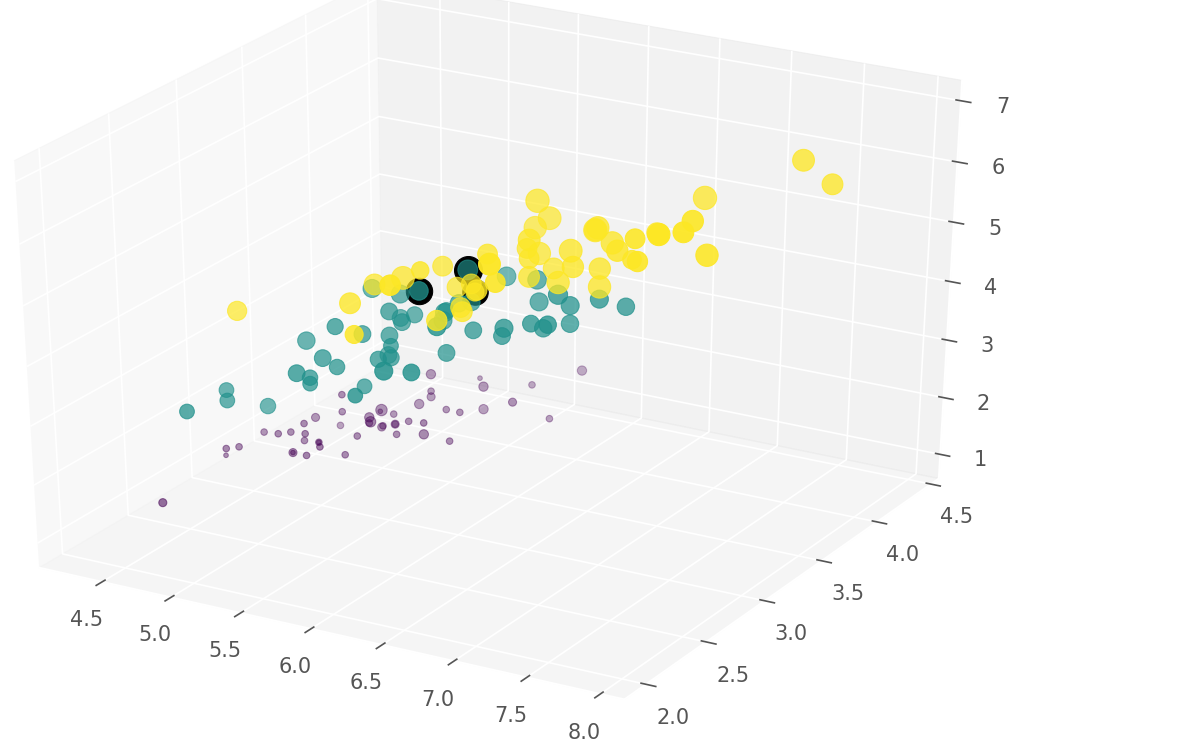

('Error =>', array([1. , 5.9, 3.2, 4.8, 1.8]), 'Actual=>', 1, 'Predict =>', 0.8901789124541258)
('Error =>', array([1. , 6. , 2.7, 5.1, 1.6]), 'Actual=>', 1, 'Predict =>', 0.7941940171323371)
('Error =>', array([1. , 6.3, 2.8, 5.1, 1.5]), 'Actual=>', 2, 'Predict =>', 0.7958030087813861)
('Accuracy', 98.0)


In [11]:
test()

In [12]:
weights

{0: array([ 0.6433229 ,  1.02149266,  3.52504035, -5.5359607 , -2.61145627]),
 1: array([14.66427999, -1.40215992, -3.71448834,  2.31410228, -4.19301387]),
 2: array([-10.45017542,  -4.7173038 ,  -5.71873092,   7.7094108 ,
         10.96391997])}